# Machine Learning Trading Bot

In this Challenge, you’ll assume the role of a financial advisor at one of the top five financial advisory firms in the world. Your firm constantly competes with the other major firms to manage and automatically trade assets in a highly dynamic environment. In recent years, your firm has heavily profited by using computer algorithms that can buy and sell faster than human traders.

The speed of these transactions gave your firm a competitive advantage early on. But, people still need to specifically program these systems, which limits their ability to adapt to new data. You’re thus planning to improve the existing algorithmic trading systems and maintain the firm’s competitive advantage in the market. To do so, you’ll enhance the existing trading signals with machine learning algorithms that can adapt to new data.

## Instructions:

Use the starter code file to complete the steps that the instructions outline. The steps for this Challenge are divided into the following sections:

* Establish a Baseline Performance

* Tune the Baseline Trading Algorithm

* Evaluate a New Machine Learning Classifier

* Create an Evaluation Report

#### Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 

1. Import the OHLCV dataset into a Pandas DataFrame.

2. Generate trading signals using short- and long-window SMA values. 

3. Split the data into training and testing datasets.

4. Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

5. Review the classification report associated with the `SVC` model predictions. 

6. Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

7. Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

8. Write your conclusions about the performance of the baseline trading algorithm in the `README.md` file that’s associated with your GitHub repository. Support your findings by using the PNG image that you saved in the previous step.

#### Tune the Baseline Trading Algorithm

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. (You’ll choose the best by comparing the cumulative products of the strategy returns.) To do so, complete the following steps:

1. Tune the training algorithm by adjusting the size of the training dataset. To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing the training window?

> **Hint** To adjust the size of the training dataset, you can use a different `DateOffset` value&mdash;for example, six months. Be aware that changing the size of the training dataset also affects the size of the testing dataset.

2. Tune the trading algorithm by adjusting the SMA input features. Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

3. Choose the set of parameters that best improved the trading algorithm returns. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

#### Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. To do so, complete the following steps:

1. Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

2. Using the original training data as the baseline model, fit another model with the new classifier.

3. Backtest the new model to evaluate its performance. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. Answer the following questions: Did this new model perform better or worse than the provided baseline model? Did this new model perform better or worse than your tuned trading algorithm?

#### Create an Evaluation Report

In the previous sections, you updated your `README.md` file with your conclusions. To accomplish this section, you need to add a summary evaluation report at the end of the `README.md` file. For this report, express your final conclusions and analysis. Support your findings by using the PNG images that you created.


In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

# Other imports
import datetime

---

## Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 


### Step 1: Import the OHLCV dataset into a Pandas DataFrame.

In [2]:

# Import the OHLCV dataset into a Pandas Dataframe
ohlcv_df = pd.read_csv(
    Path("./Resources/emerging_markets_ohlcv.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
ohlcv_df.head()

/var/folders/22/c3r98x554qv7s1kh3_393tcm0000gn/T/ipykernel_60030/2544473285.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ohlcv_df = pd.read_csv(
/var/folders/22/c3r98x554qv7s1kh3_393tcm0000gn/T/ipykernel_60030/2544473285.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ohlcv_df = pd.read_csv(


,open,high,low,close,volume
date,,,,,
2015-01-21 09:30:00,23.83,23.83,23.83,23.83,100
2015-01-21 11:00:00,23.98,23.98,23.98,23.98,100
2015-01-22 15:00:00,24.42,24.42,24.42,24.42,100
2015-01-22 15:15:00,24.42,24.44,24.42,24.44,200
2015-01-22 15:30:00,24.46,24.46,24.46,24.46,200


In [3]:
# Filter the date index and close columns
signals_df = ohlcv_df.loc[:, ["close"]]

#Instantiate for use later
signal_tuner_df = signals_df.copy() 

# Use the pct_change function to generate returns from close prices
signals_df["Actual Returns"] = signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns
date,,
2015-01-21 11:00:00,23.98,0.006295
2015-01-22 15:00:00,24.42,0.018349
2015-01-22 15:15:00,24.44,0.000819
2015-01-22 15:30:00,24.46,0.000818
2015-01-26 12:30:00,24.33,-0.005315


,close,Actual Returns
date,,
2021-01-22 09:30:00,33.27,-0.006866
2021-01-22 11:30:00,33.35,0.002405
2021-01-22 13:45:00,33.42,0.002099
2021-01-22 14:30:00,33.47,0.001496
2021-01-22 15:45:00,33.44,-0.000896


## Step 2: Generate trading signals using short- and long-window SMA values. 

In [4]:
# Set the short window and long window
short_window = 4
long_window = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463


,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495


In [5]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214,1.0
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308,1.0
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360,1.0
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411,1.0
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463,1.0


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215,-1.0
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445,1.0
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745,1.0
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085,1.0
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495,-1.0


In [6]:
signals_df['Signal'].value_counts()

Signal
 1.0    2368
-1.0    1855
Name: count, dtype: int64

In [7]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214,1.0,NaN
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308,1.0,0.000000
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360,1.0,0.000803
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411,1.0,0.000401
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463,1.0,0.001202


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215,-1.0,-0.006866
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445,1.0,-0.002405
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745,1.0,0.002099
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085,1.0,0.001496
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495,-1.0,-0.000896


<Axes: xlabel='date'>

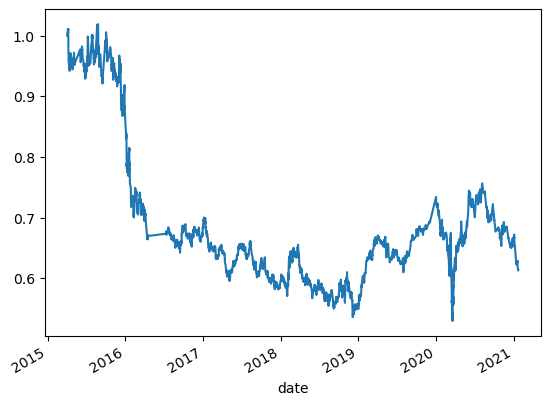

In [8]:
# Plot Strategy Returns to examine performance
(1 + signals_df['Strategy Returns']).cumprod().plot()

### Step 3: Split the data into training and testing datasets.

In [9]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [10]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Review the value counts
y.value_counts()

Signal
 1.0    2368
-1.0    1855
Name: count, dtype: int64

In [11]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2015-04-02 15:00:00


In [12]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=6)

# Display the training end date
print(training_end)

2015-10-02 15:00:00


In [13]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [14]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_test.head()

,SMA_Fast,SMA_Slow
date,,
2015-10-05 09:45:00,21.42725,21.56409
2015-10-05 11:30:00,21.53225,21.55469
2015-10-05 13:15:00,21.60250,21.54289
2015-10-05 14:30:00,21.66750,21.53089
2015-10-05 14:45:00,21.75250,21.51939


In [15]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

In [16]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
print(svm_pred)


[1. 1. 1. ... 1. 1. 1.]


### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [17]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

print("\nThis model does not perform very well at all, and we might be better off just flipping a coin.")
print("The recall rate for prediction buy calls was excellent at 96%, but terrible for sell signals at 4%")

              precision    recall  f1-score   support

        -1.0       0.44      0.02      0.04      1732
         1.0       0.56      0.98      0.71      2211

    accuracy                           0.56      3943
   macro avg       0.50      0.50      0.38      3943
weighted avg       0.51      0.56      0.42      3943


This model does not perform very well at all, and we might be better off just flipping a coin.
The recall rate for prediction buy calls was excellent at 96%, but terrible for sell signals at 4%


### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [18]:
print(X.index.max())
print(X_test.index.max())
print(signals_df.index.max())



2021-01-22 15:45:00
2021-01-22 15:45:00
2021-01-22 15:45:00


In [19]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df["Predicted"] = svm_pred

# Add the actual returns to the DataFrame
predictions_df["Actual Returns"] = signals_df.loc[X_test.index, "Actual Returns"]

# Add the strategy returns to the DataFrame
predictions_df["Strategy Returns"] = predictions_df["Predicted"] * predictions_df["Actual Returns"]

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
date,,,
2015-10-05 09:45:00,1.0,0.013532,0.013532
2015-10-05 11:30:00,1.0,0.002302,0.002302
2015-10-05 13:15:00,1.0,-0.000919,-0.000919
2015-10-05 14:30:00,1.0,0.000920,0.000920
2015-10-05 14:45:00,1.0,0.002756,0.002756


,Predicted,Actual Returns,Strategy Returns
date,,,
2021-01-22 09:30:00,1.0,-0.006866,-0.006866
2021-01-22 11:30:00,1.0,0.002405,0.002405
2021-01-22 13:45:00,1.0,0.002099,0.002099
2021-01-22 14:30:00,1.0,0.001496,0.001496
2021-01-22 15:45:00,1.0,-0.000896,-0.000896


### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

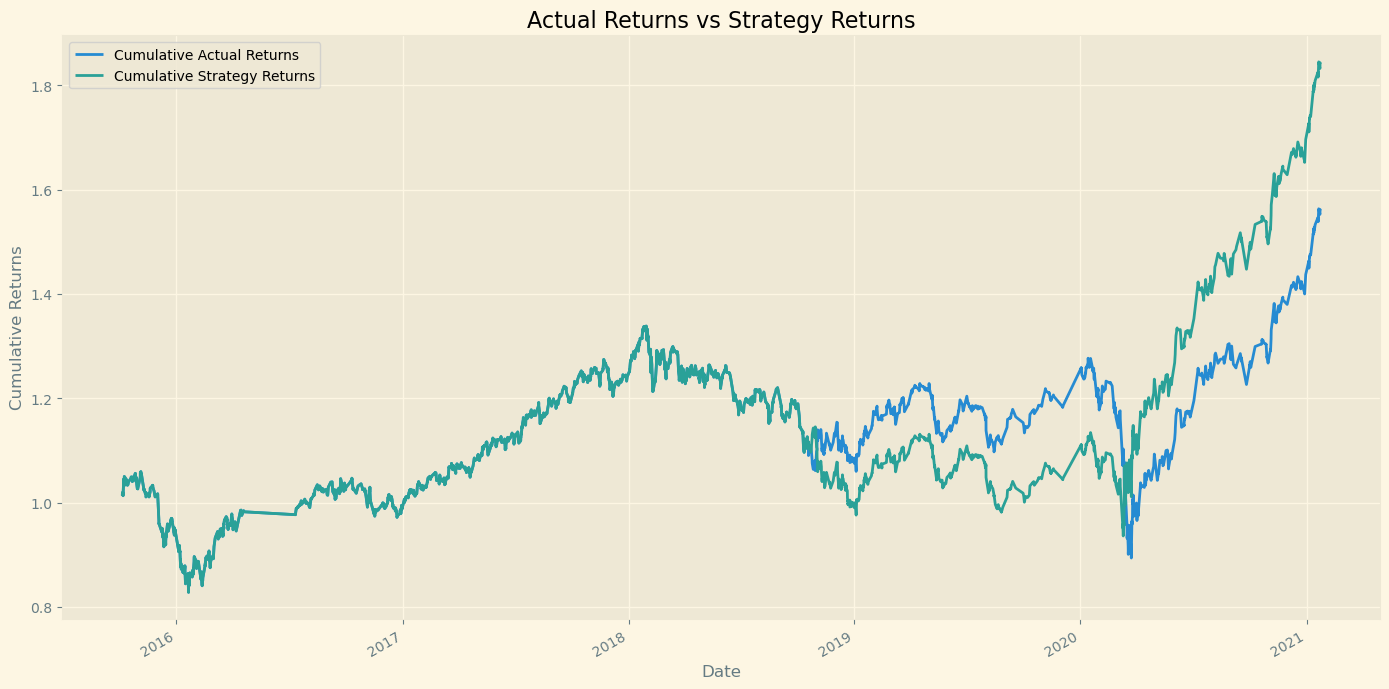

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot the actual returns versus the strategy returns

predictions_df["Cumulative Actual Returns"] = (1 + predictions_df["Actual Returns"]).cumprod()
predictions_df["Cumulative Strategy Returns"] = (1 + predictions_df["Strategy Returns"]).cumprod()

#Plotting
plt.style.use('Solarize_Light2')
predictions_df[["Cumulative Actual Returns", "Cumulative Strategy Returns"]].plot(figsize=(14,7))
plt.title("Actual Returns vs Strategy Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig("./Exported_pngs/01_baseline_untuned.png")


---

## Tune the Baseline Trading Algorithm

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. You’ll choose the best by comparing the cumulative products of the strategy returns.

### Step 1: Tune the training algorithm by adjusting the size of the training dataset. 

To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing the training window?

In [21]:
# Step 1:

# Filter the date index and close columns
signals_df_T1 = ohlcv_df.loc[:, ["close"]]

# Instantiate for use later
signal_tuner_df_T1 = signals_df_T1.copy() 

# Use the pct_change function to generate returns from close prices
signals_df_T1["Actual Returns"] = signals_df_T1["close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df_T1 = signals_df_T1.dropna()

In [22]:
# Step 2

# Set the short window and long window for T1
short_window_T1 = 10
long_window_T1 = 50

# Generate the fast and slow simple moving averages (4 and 100 days, respectively) for T1
signals_df_T1['SMA_Fast'] = signals_df_T1['close'].rolling(window=short_window_T1).mean()
signals_df_T1['SMA_Slow'] = signals_df_T1['close'].rolling(window=long_window_T1).mean()

# Drop NaN values from the DataFrame for T1
signals_df_T1 = signals_df_T1.dropna()

# Initialize the new Signal column for T1
signals_df_T1['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0 for T1, generate signal to buy stock long
signals_df_T1.loc[(signals_df_T1['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0 for T1, generate signal to sell stock short
signals_df_T1.loc[(signals_df_T1['Actual Returns'] < 0), 'Signal'] = -1

# Calculate the strategy returns and add them to the signals_df_T1 DataFrame
signals_df_T1['Strategy Returns'] = signals_df_T1['Actual Returns'] * signals_df_T1['Signal'].shift()


In [23]:
## Step 3: Splitting the data into training and testing

# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X_T1
X_T1 = signals_df_T1[["SMA_Fast", "SMA_Slow"]].shift().dropna()

# Create the target set selecting the Signal column and assigning it to y_T1
y_T1 = signals_df_T1["Signal"].loc[X_T1.index] 

# Select the start of the training period
training_begin_T1 = X_T1.index.min()

# Select the ending period for the training data with an offset of **CHOOSE TRAINING PERIOD** months
training_end_T1 = X_T1.index.min() + DateOffset(months=5)

# Generate the X_train_T1 and y_train_T1 DataFrames
X_train_T1 = X_T1.loc[training_begin_T1:training_end_T1]
y_train_T1 = y_T1.loc[training_begin_T1:training_end_T1]

# Generate the X_test_T1 and y_test_T1 DataFrames
X_test_T1 = X_T1.loc[training_end_T1+DateOffset(hours=1):]
y_test_T1 = y_T1.loc[training_end_T1+DateOffset(hours=1):]

# Scale the features DataFrames for T1

# Create a StandardScaler instance
scaler_T1 = StandardScaler()

# Apply the scaler model to fit the X_train_T1 data
X_scaler_T1 = scaler_T1.fit(X_train_T1)

# Transform the X_train_T1 and X_test_T1 DataFrames using the X_scaler_T1
X_train_scaled_T1 = X_scaler_T1.transform(X_train_T1)
X_test_scaled_T1 = X_scaler_T1.transform(X_test_T1)

In [24]:
## Step 4: Model creation, training, and predictions

# Instantiate the SVC classifier model instance for T1
svm_model_T1 = svm.SVC()

# Fit the model to the data using the training data for T1
svm_model_T1 = svm_model_T1.fit(X_train_scaled_T1, y_train_T1)

# Make predictions using the testing data for T1
svm_pred_T1 = svm_model_T1.predict(X_test_scaled_T1)

In [25]:
# Print the model's predicted values for T1
print(svm_pred_T1)

# Evaluate the model using the predictions and testing data for T1
svm_testing_report_T1 = classification_report(y_test_T1, svm_pred_T1)

# Print the classification report
print(svm_testing_report_T1)

[ 1. -1. -1. ...  1.  1.  1.]
              precision    recall  f1-score   support

        -1.0       0.43      0.03      0.05      1787
         1.0       0.56      0.97      0.71      2277

    accuracy                           0.56      4064
   macro avg       0.49      0.50      0.38      4064
weighted avg       0.50      0.56      0.42      4064



In [26]:
## Step 6: Create and review predictions DataFrame for T1

# Create a predictions DataFrame for T1
predictions_df_T1 = pd.DataFrame(index=X_test_T1.index)

# Add the model predictions for T1 to the DataFrame
predictions_df_T1["Predicted"] = svm_pred_T1

# Add the actual returns for T1 to the DataFrame
predictions_df_T1["Actual Returns"] = signals_df.loc[X_test_T1.index, "Actual Returns"]

# Add the strategy returns for T1 to the DataFrame
predictions_df_T1["Strategy Returns"] = predictions_df_T1["Predicted"] * predictions_df_T1["Actual Returns"]

# Display the DataFrame's head and tail
display(predictions_df_T1.head())
display(predictions_df_T1.tail())

,Predicted,Actual Returns,Strategy Returns
date,,,
2015-07-24 09:45:00,1.0,-0.005199,-0.005199
2015-07-24 10:15:00,-1.0,-0.002178,0.002178
2015-07-27 11:45:00,-1.0,-0.013531,0.013531
2015-07-27 12:30:00,-1.0,-0.003540,0.003540
2015-07-27 13:45:00,-1.0,-0.002664,0.002664


,Predicted,Actual Returns,Strategy Returns
date,,,
2021-01-22 09:30:00,1.0,-0.006866,-0.006866
2021-01-22 11:30:00,1.0,0.002405,0.002405
2021-01-22 13:45:00,1.0,0.002099,0.002099
2021-01-22 14:30:00,1.0,0.001496,0.001496
2021-01-22 15:45:00,1.0,-0.000896,-0.000896


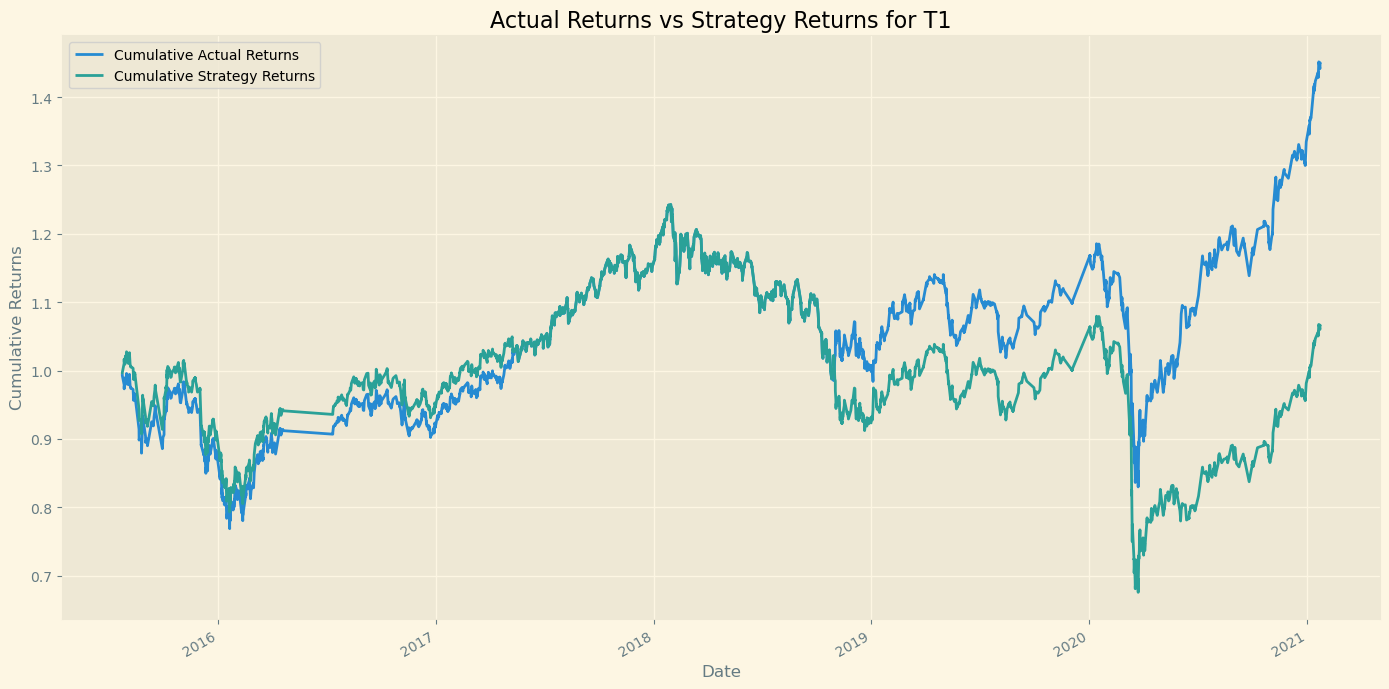

In [27]:
## Step 7: Plotting

# Calculate cumulative returns for the actual and strategy returns
predictions_df_T1["Cumulative Actual Returns"] = (1 + predictions_df_T1["Actual Returns"]).cumprod()
predictions_df_T1["Cumulative Strategy Returns"] = (1 + predictions_df_T1["Strategy Returns"]).cumprod()

# Plot the cumulative returns
plt.style.use('Solarize_Light2')
predictions_df_T1[["Cumulative Actual Returns", "Cumulative Strategy Returns"]].plot(figsize=(14,7))
plt.title("Actual Returns vs Strategy Returns for T1")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.tight_layout()
plt.show()

In [28]:
# Save the figure
plt.savefig("./Exported_pngs/13_5month_10_and_50day.png")

<Figure size 640x480 with 0 Axes>

### Step 2: Tune the trading algorithm by adjusting the SMA input features. 

Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

### Step 3: Choose the set of parameters that best improved the trading algorithm returns. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

In [29]:
print("5 months is the best for training and gets us to par")

5 months is the best for training and gets us to par


In [30]:
print("5 months training data, 10 day short, 90 day long is like +40%, 20 day and 50 day is like +60%")

5 months training data, 10 day short, 90 day long is like +40%, 20 day and 50 day is like +60%


---

## Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. 

### Step 1:  Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

In [31]:
# Import a new classifier from SKLearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree


In [32]:

# Initiate the model instance
tree_model = DecisionTreeClassifier(random_state=1)

### Step 2: Using the original training data as the baseline model, fit another model with the new classifier.

In [33]:
# Fit the model using the training data
tree_model.fit(X_train, y_train)

# Use the testing dataset to generate the predictions for the new model
tree_pred = tree_model.predict(X_test)

# Review the model's predicted values
print(tree_pred)


[ 1. -1. -1. ... -1. -1. -1.]


In [34]:
print(f'Accuracy: {accuracy_score(y_test, tree_pred)}')
print(f'Precision: {precision_score(y_test, tree_pred)}')
print(f'Recall: {recall_score(y_test, tree_pred)}')
print(f'F1 Score: {f1_score(y_test, tree_pred)}')


Accuracy: 0.4912503170174994
Precision: 0.5601173020527859
Recall: 0.4319312528267752
F1 Score: 0.4877425944841675


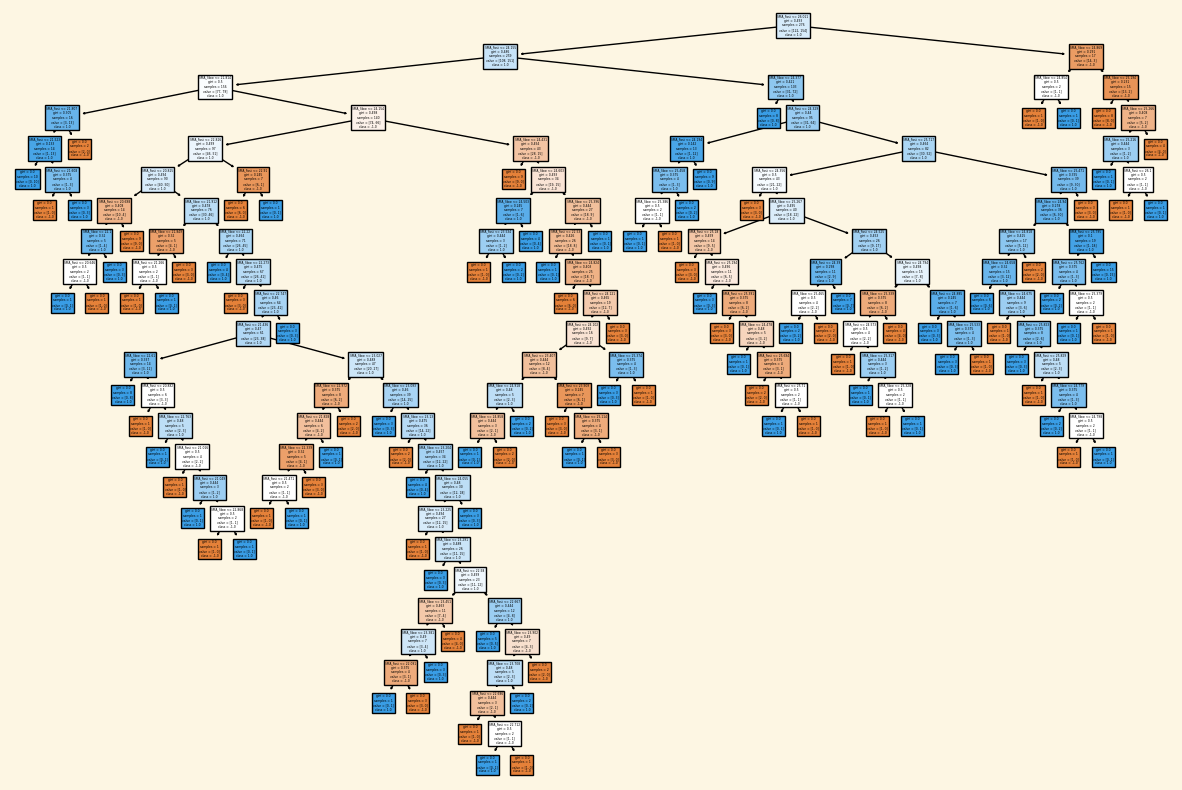

In [41]:
# Convert class labels to strings
class_names_str = [str(cls) for cls in tree_model.classes_]

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=class_names_str)
plt.show()


### Step 3: Backtest the new model to evaluate its performance. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. 

Answer the following questions: 
Did this new model perform better or worse than the provided baseline model? 
Did this new model perform better or worse than your tuned trading algorithm?

In [ ]:
# Use a classification report to evaluate the model using the predictions and testing data
# YOUR CODE HERE

# Print the classification report
# YOUR CODE HERE


In [ ]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
# YOUR CODE HERE

# Add the SVM model predictions to the DataFrame
# YOUR CODE HERE

# Add the actual returns to the DataFrame
# YOUR CODE HERE

# Add the strategy returns to the DataFrame
# YOUR CODE HERE

# Review the DataFrame
# YOUR CODE HERE


In [ ]:
# Plot the actual returns versus the strategy returns
# YOUR CODE HERE